In [356]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [357]:
import random
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

In [358]:
def PartitionRaja_Discover(X, Y, k):

    assert all(array(X) == array(sorted(X))), "X must be sorted!"

    X = array(X)
    Y = array(Y)
    m = len(X)
    DP1 = [[None for j in range(k+1)] for i in range(m+1)]
    DP2 = zeros((m+1, k+1), dtype=int)

    cuml_sum_y = concatenate([[0], cumsum(Y)])

    DP2[:m+1,0] = cuml_sum_y

    for i in range(1, m+1):
        for j in range(1, k+1):
            choices = []
            for l in range(0,i+1):
                nxt_errs = DP2[l,j-1] + (cuml_sum_y[i]-cuml_sum_y[l]) + concatenate([[0], cumsum((-1)**(Y[arange(l, i)] == 1))])
                min_err = argmin(nxt_errs)
                choices.append((nxt_errs[min_err], (l, arange(l,i+1)[min_err])))

            DP2[i,j], DP1[i][j] = min(choices)

    good = []
    cur = DP1[m][k]
    for i in range(k,0,-1):
        good.append(cur)
        cur = DP1[cur[0]][i-1]
        if cur == None:
            break
    good = sorted(good)
    temp = concatenate([[0], X, [1]])
    reps = (temp[1:]+temp[:-1]) / 2.0
    partitions = [(reps[a], reps[b]) for a,b in good]

    return partitions

In [359]:
def form_a_dataset(number_of_samples):
    dataset = []
    while(number_of_samples>0):
        x = round(random.uniform(0, 1), 2)
        y = random.randint(0, 2)
        dataset.append((x,y))
        number_of_samples-=1
    sorted_dataset = sorted(dataset, key=lambda x: x[0])
    return sorted_dataset

In [360]:
random.seed(65)
number_of_samples = 10
dataset = form_a_dataset(number_of_samples)
print(dataset)

[(0.03, 0), (0.13, 0), (0.17, 0), (0.22, 1), (0.24, 0), (0.3, 1), (0.57, 0), (0.66, 1), (0.7, 1), (0.95, 1)]


In [361]:
def find_true_error(partitions,X,Y):
    intervals = [(0.0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0)]
    error_probability = 0 
    for index, interval in enumerate(intervals):
        L = interval[0]
        R = interval[1]
        predicted_positive = 0
        for partition in partitions:
           l = partition[0]
           r = partition[1]
           if r < L:
               continue
           elif l > R:
               continue
           else:
               predicted_positive = predicted_positive + min(R, r) - max(L, l)
        predicted_negative = R - L - predicted_positive
        if index % 2 == 0:
            error_probability = error_probability + (0.7) * (predicted_negative) + (0.3) * predicted_positive
        else:
            error_probability = error_probability + (0.2) * (predicted_negative) + (0.8) * predicted_positive
    error = error_probability * len(X)
    return error

In [362]:
def find_empirical_error(partitions, X, Y):
    error = 0
    dataset_len = len(X)
    for i in range(0, dataset_len):
        x = X[i]
        y = Y[i]
        isPositive = False
        for partition in partitions:
            if partition[0] <= x and x <= partition[1]:
                isPositive = True
        if (isPositive == True and y == 0) or (isPositive == False and y == 1):
            error+=1
    return error

In [363]:
def SUBTASK1(partitions, X, Y):
    empirical_error = find_empirical_error(partitions, X, Y)
    true_error = find_true_error(partitions, X, Y)
    return [true_error, empirical_error]

In [364]:
def plotGraph(X, Y, title):
    plt.plot(X, Y, marker='o', linestyle='-', color='b', label='Data Points')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(title)
    plt.legend()  
    plt.show()

In [365]:
X = [dataset_instance[0] for dataset_instance in dataset]
Y = [dataset_instance[1] for dataset_instance in dataset]
partitions = PartitionRaja_Discover(X,Y,3)
[true_error, empirical_error]=SUBTASK1(partitions, X, Y)
print("Emperical Error : ", empirical_error)
print("True Error : ", true_error)

Emperical Error :  0
True Error :  3.9099999999999997


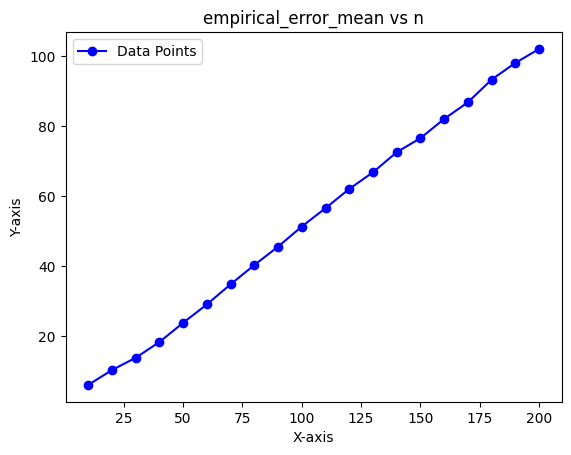

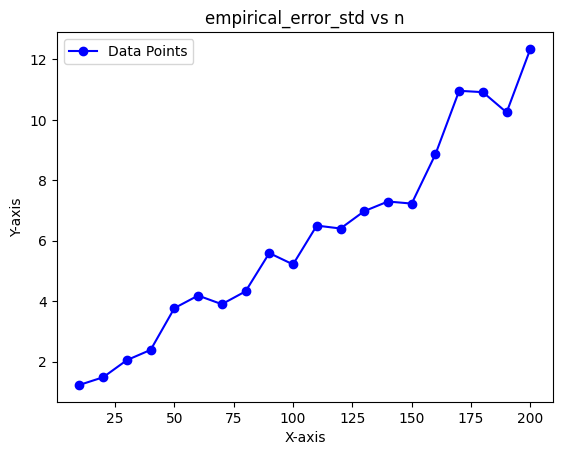

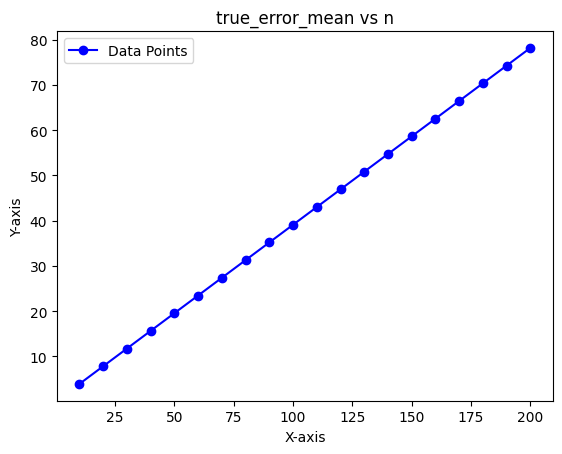

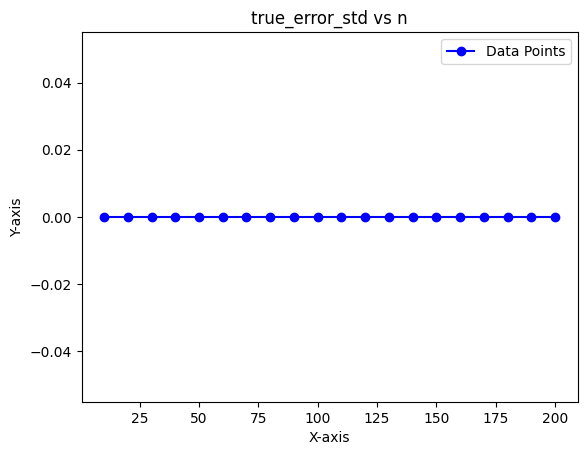

In [366]:
seeds = [0,100,200,300]
empirical_error_mean_over_n =[]
empirical_error_std_over_n =[]
true_error_mean_over_n =[]
true_error_std_over_n =[]

for n in range(10, 210, 10):
    true_errors = []
    empirical_errors = []
    for seed in seeds:
        np.random.seed(seed)
        random.seed(seed)
        number_of_samples = n
        dataset = form_a_dataset(number_of_samples)
        X = [dataset_instance[0] for dataset_instance in dataset]
        Y = [dataset_instance[1] for dataset_instance in dataset]
        [true_error, empirical_error] = SUBTASK1(partitions, X, Y)
        true_errors.append(true_error)
        empirical_errors.append(empirical_error)
    empirical_error_mean_over_n.append(np.mean(empirical_errors))
    empirical_error_std_over_n.append(np.std(empirical_errors))
    true_error_mean_over_n.append(np.mean(true_errors))
    true_error_std_over_n.append(np.std(true_errors))

N = []
for n in range(10, 210, 10):
    N.append(n)

title = 'empirical_error_mean vs n'
plotGraph(N, empirical_error_mean_over_n, title)

title = 'empirical_error_std vs n'
plotGraph(N, empirical_error_std_over_n, title)

title = 'true_error_mean vs n'
plotGraph(N, true_error_mean_over_n, title)

title = 'true_error_std vs n'
plotGraph(N, true_error_std_over_n, title)

1
2
3
4
5
6
7
8
9
10


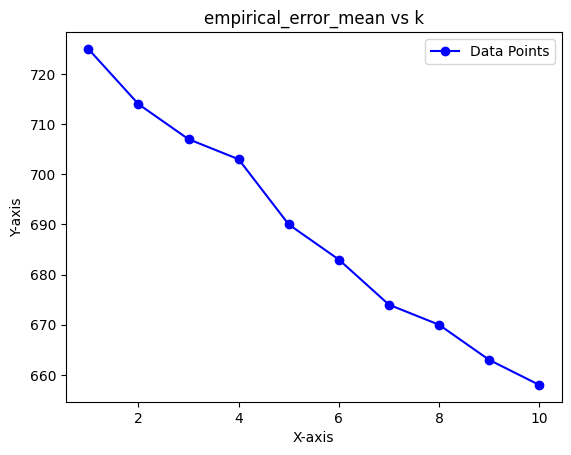

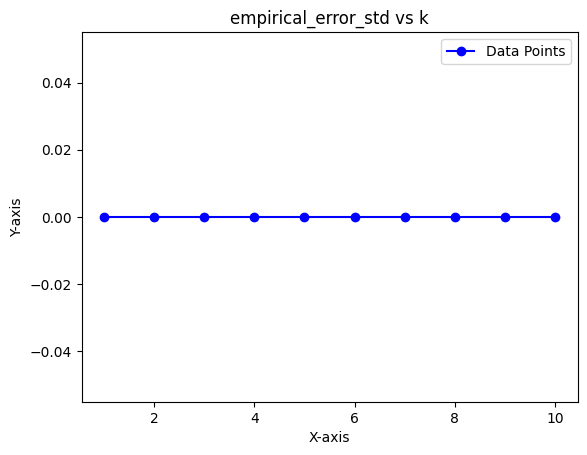

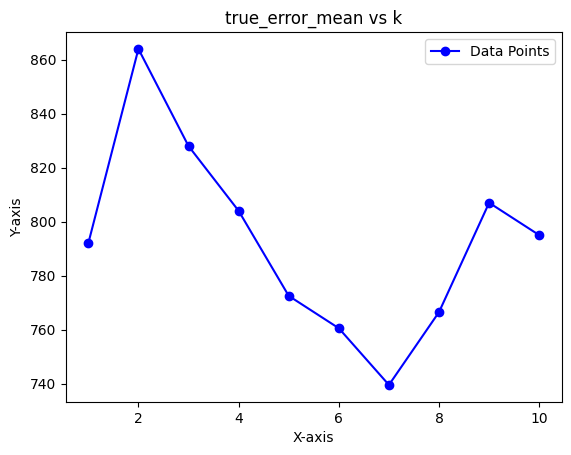

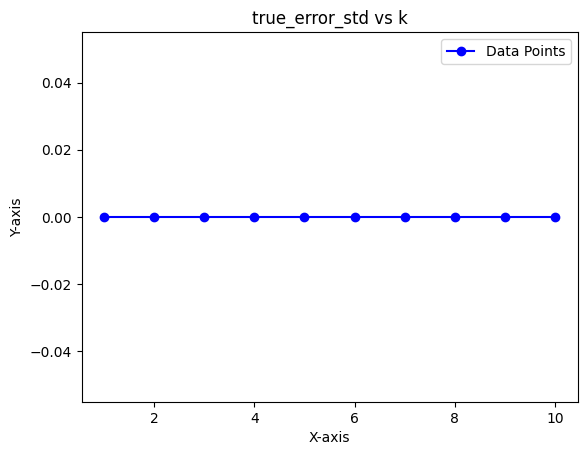

In [367]:
number_of_samples = 1500
dataset = form_a_dataset(number_of_samples)
X = [dataset_instance[0] for dataset_instance in dataset]
Y = [dataset_instance[1] for dataset_instance in dataset]

empirical_error_mean_over_n =[]
empirical_error_std_over_n =[]
true_error_mean_over_n =[]
true_error_std_over_n =[]

seeds = [0,100,200,300,400,500,600,700,800,900]
empirical_error_mean_over_n =[]
empirical_error_std_over_n =[]
true_error_mean_over_n =[]
true_error_std_over_n =[]

for k in range(1, 11):
    true_errors = []
    empirical_errors = []
    print(k)
    # for seed in seeds:
    np.random.seed(seed)
    random.seed(seed)
    partitions = PartitionRaja_Discover(X,Y,k)
    [true_error, empirical_error] = SUBTASK1(partitions, X, Y)
    true_errors.append(true_error)
    empirical_errors.append(empirical_error)
    empirical_error_mean_over_n.append(np.mean(empirical_errors))
    empirical_error_std_over_n.append(np.std(empirical_errors))
    true_error_mean_over_n.append(np.mean(true_errors))
    true_error_std_over_n.append(np.std(true_errors))

K = []
for k in range(1, 11):
    K.append(k)

title = 'empirical_error_mean vs k'
plotGraph(K, empirical_error_mean_over_n, title)

title = 'empirical_error_std vs k'
plotGraph(K, empirical_error_std_over_n, title)

title = 'true_error_mean vs k'
plotGraph(K, true_error_mean_over_n, title)

title = 'true_error_std vs k'
plotGraph(K, true_error_std_over_n, title)